In [ ]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
import torchvision.transforms as transforms

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import os
from PIL import Image 
from numpy import array 

In [ ]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, image):

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return torch.from_numpy(image)

In [ ]:
class MelanomaDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, dir_path, transform=None):
        """
        Args
            dir_path (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.dir_path = dir_path
        self.transform = transform

    def __len__(self):
        arr = os.listdir(self.dir_path)
        return len(arr)

    def __getitem__(self, idx):

        arr = os.listdir(self.dir_path)
        img_name = os.path.join(self.dir_path, arr[idx])
        label = arr[idx].split('_')[1].split('.')[0]
        img = Image.open(img_name) 
        arr = np.array(img) 
        return self.transform(arr), torch.tensor(int(label))

In [ ]:
class MelanomaUnlabelledDataset(MelanomaDataset):
      def __getitem__(self, idx):

        arr = os.listdir(self.dir_path)
        img_name = os.path.join(self.dir_path, arr[idx])
        img = Image.open(img_name) 
        arr = np.array(img) 
        return self.transform(arr)

In [ ]:
train_dataset = MelanomaDataset('./drive/My Drive/data/Melanoma/labelled', ToTensor())


In [ ]:
predict_dataset = MelanomaUnlabelledDataset('./drive/My Drive/data/Melanoma/unlabelled', ToTensor())

In [ ]:
train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=40, shuffle=True, num_workers=1)

In [ ]:
predict_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=40, shuffle=True, num_workers=1)

In [ ]:
def print_images(batch):
    image_grid = torchvision.utils.make_grid(batch, nrow=4)
    plt.imshow(image_grid.permute(1, 2, 0))
    plt.pause(0.05)


torch.Size([40, 3, 32, 32])


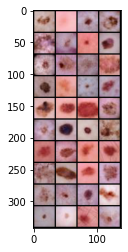

In [ ]:
for i, data in enumerate(predict_dataset_loader):
    inputs = data[0]
    print(inputs.shape)
    print_images(inputs)
    break;

torch.Size([40, 3, 32, 32])
torch.Size([40])


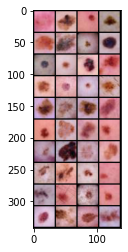

In [ ]:
for i, data in enumerate(train_dataset_loader):
    batch, labels = data
    print(batch.shape)
    print(labels.shape)
    print_images(batch)
    break;